# Exercise Set 1

## Declaration of generative AI use
please note that I have used generative AI to do formatting for markdown cells (mostly for latex in q6) and commenting on my code. 
I have not used generative ai for the creation of any of my code or text.

In [222]:
# Import statements
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## Problem 1 

In [228]:
### Task 1.a
data = pd.read_csv('data/p1.csv')
data = data.drop(["id", 'InChIKey', "SMILES"], axis=1)
data.head()

,pSat_Pa,ChemPot_kJmol,FreeEnergy_kJmol,HeatOfVap_kJmol,MW,NumOfAtoms,NumOfC,NumOfO,NumOfN,NumHBondDonors,...,ester,ether (alicyclic),nitrate,nitro,aromatic hydroxyl,carbonylperoxynitrate,peroxide,hydroperoxide,carbonylperoxyacid,nitroester
0,0.000010,4.269730,-2.639635e+06,127.665681,253.043381,28,7,9,1,3,...,0,0,1,0,0,0,1,1,0,0
1,0.000003,5.474680,-1.896203e+06,129.070835,180.027003,20,5,7,0,4,...,0,0,0,0,0,0,0,1,0,0
2,0.000146,16.510064,-3.963845e+06,118.474897,359.992468,32,7,15,2,3,...,0,1,1,0,0,1,0,1,1,0
3,0.000010,10.097080,-2.837243e+06,124.455256,269.038296,29,7,10,1,3,...,0,0,1,0,0,0,0,1,1,0
4,0.014830,14.133175,-3.070631e+06,96.152881,281.997159,25,6,11,2,1,...,0,0,2,0,0,0,1,0,0,0


In [134]:
### Task 1.b
subset = data[["pSat_Pa","NumOfConf","ChemPot_kJmol"]]
subset.describe()

,pSat_Pa,NumOfConf,ChemPot_kJmol
count,4.000000e+02,400.000000,400.000000
mean,2.961988e+00,223.497500,12.434427
std,3.353178e+01,190.915391,4.778872
min,2.458865e-10,2.000000,-3.160050
25%,4.926186e-06,73.250000,9.722915
50%,1.210795e-04,172.500000,12.780677
75%,2.287152e-03,324.250000,15.658871
max,5.628970e+02,1058.000000,28.095686


In [135]:
### Task 1.c
ChemPot_kJmol = subset["ChemPot_kJmol"]
mean = ChemPot_kJmol.mean()
std = ChemPot_kJmol.std()
print("Mean: ", mean)
print("Standard deviation: ", std)

Mean:  12.434427089600002
Standard deviation:  4.77887217784492


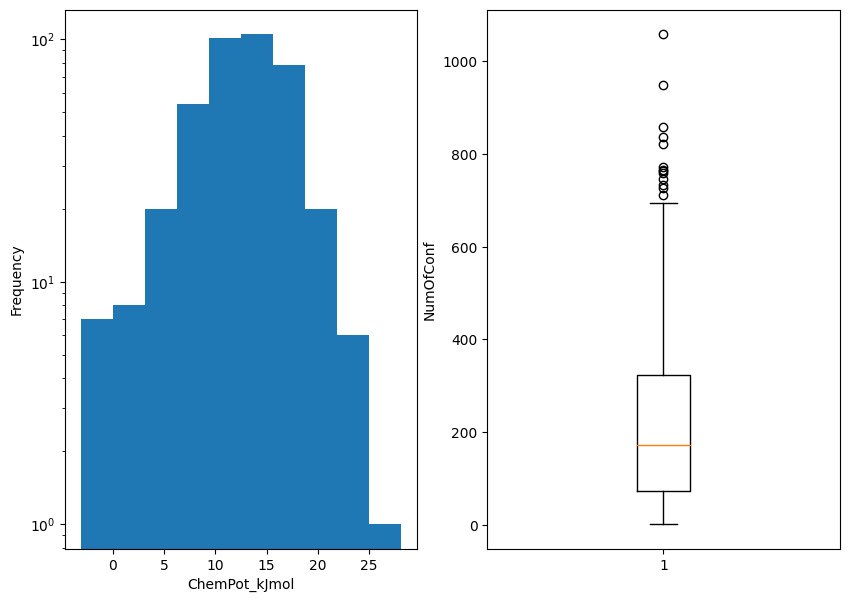

In [136]:
### Task 1.d
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.hist(ChemPot_kJmol, bins=10, log=True)
plt.xlabel("ChemPot_kJmol")
plt.ylabel("Frequency")
plt.subplot(1,2,2)
plt.boxplot(subset["NumOfConf"])
plt.ylabel("NumOfConf")
plt.show()



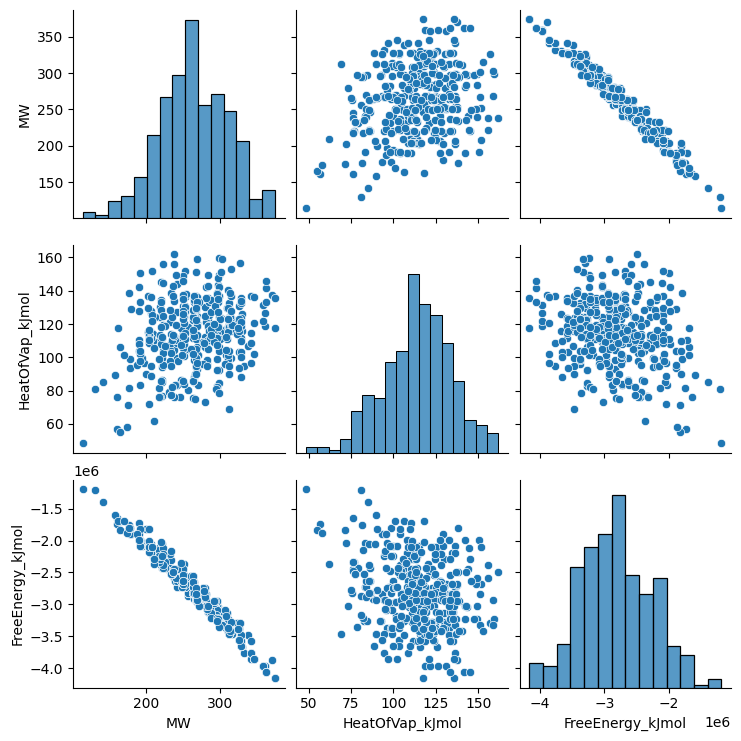

In [229]:
### Task 1.e
sns.pairplot(data, vars=["MW", "HeatOfVap_kJmol", "FreeEnergy_kJmol"])

## Problem 2

In [232]:
### Task 2.a (code)


# Load data
train_syn = pd.read_csv('data/train_syn.csv')
valid_syn = pd.read_csv('data/valid_syn.csv')
test_syn = pd.read_csv('data/test_syn.csv')

# generate trava_syn
trva_syn = pd.DataFrame(np.concatenate((train_syn, 
                                        valid_syn), axis=0))
trva_syn.columns = train_syn.columns

# Initialize DataFrame to store the results
out_table = pd.DataFrame(columns=['Degree', 'Train',
                                   'Validation', 'Test',
                                   'TestTRVA', 'CV'])
out_table['Degree'] = range(0, 9)
out_table = out_table.set_index('Degree') 

# Initialize linear regression model
model = LinearRegression()

for degree in range(9):
    # Iterate over different degrees of polynomial 
    # and store results in the DataFrame
    poly = PolynomialFeatures(degree=degree)
    X_train = poly.fit_transform(train_syn[['x']])
    X_valid = poly.fit_transform(valid_syn[['x']])
    X_test = poly.fit_transform(test_syn[['x']])
    X_trva = poly.fit_transform(trva_syn[['x']]) 
    
    # Fit model using training data and calculate errors
    model.fit(X_train, train_syn['y'])
    out_table['Train'][degree] = mean_squared_error(train_syn['y'],
                                                model.predict(X_train))
    out_table['Validation'][degree] = mean_squared_error(valid_syn['y'],
                                                model.predict(X_valid))
    out_table['Test'][degree] = mean_squared_error(test_syn['y'],
                                                model.predict(X_test))
    
    # Fit model using training and validation data and calculate errors
    model.fit(X_trva, trva_syn['y'])
    out_table['TestTRVA'][degree] = mean_squared_error(test_syn['y'],
                                                model.predict(X_test))

    cv = cross_val_score(model, X_trva, trva_syn['y'],
                         cv=5, scoring='neg_mean_squared_error')
    out_table['CV'][degree] = np.mean(-cv) 

# Display the results table
out_table


,Train,Validation,Test,TestTRVA,CV
Degree,,,,,
0,4.512261,6.659344,11.716464,11.263217,6.175722
1,4.088535,7.127844,8.876307,9.934943,7.048031
2,0.218586,0.293732,0.245847,0.214016,0.307891
3,0.216819,0.283447,0.29008,0.275111,0.365361
4,0.118796,0.624726,0.969078,0.223993,0.537302
5,0.096532,0.57348,4.894836,1.039089,0.462643
6,0.007574,3.416787,213.29714,0.881471,0.593473
7,0.004999,6.862993,1261.98807,0.271719,0.658296
8,0.002082,401.65178,154266.87136,11.223554,2.037385


### task a (explanation)
I would choose the polynomial order based on cross validation of the training data. This would lead to picking polynomial degree 2.

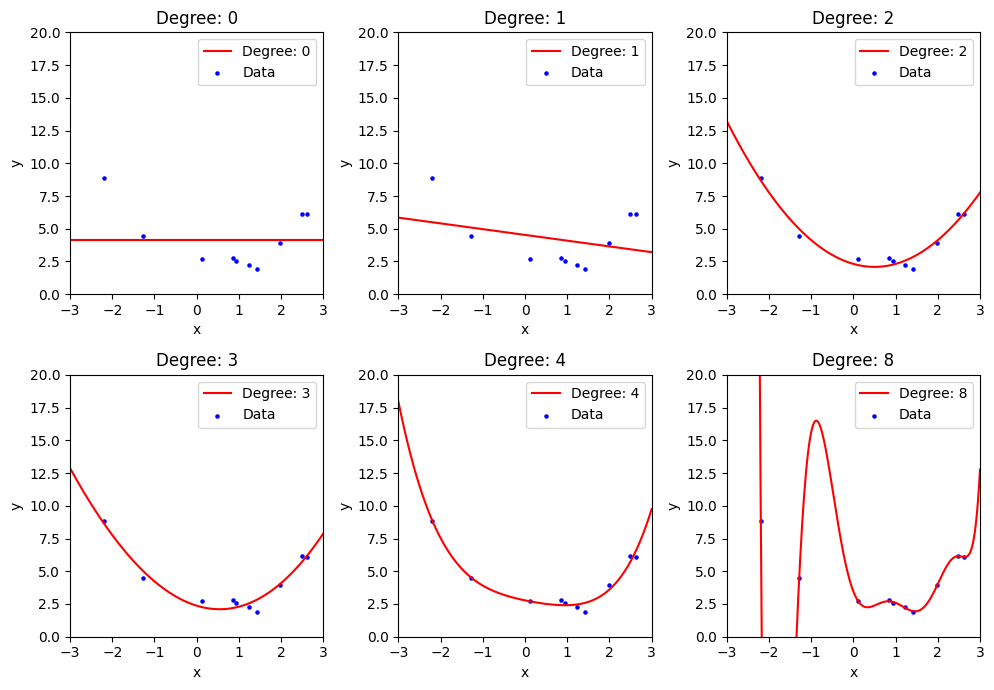

In [230]:
### Task 2.b (code)


degrees = [0, 1, 2, 3, 4, 8]
plt.figure(figsize=(10,7))

# Initialize linear regression model
model = LinearRegression()

# Loop through each degree and create a subplot for each
for i, degree in enumerate(degrees):
    plt.subplot(2, 3, i + 1) 

    # fit model for the correct degree
    poly = PolynomialFeatures(degree=degree)
    X_train = poly.fit_transform(train_syn[['x']])
    model.fit(X_train, train_syn['y'])

    # Create a range of x values for plotting the 
    # polynomial curve
    x_plot = np.linspace(-3, 3, 256)
    y_plot = model.predict(poly.fit_transform(pd.DataFrame(x_plot)))

    # define subplot variables and plot the data and 
    # polynomial curve
    plt.ylim(0, 20)
    plt.xlim(-3, 3)
    plt.plot(x_plot, y_plot, label='Degree: ' 
             + str(degree), color='red')
    plt.scatter(train_syn['x'], train_syn['y'],
                label='Data', color='blue', s=5)
    plt.legend()
    plt.title('Degree: ' + str(degree))
    plt.xlabel('x')
    plt.ylabel('y')

# plot all plots
plt.tight_layout()
plt.show()
    

In [140]:
### Task 2.c

# Load real train and test data
train_real = pd.read_csv('data/train_real.csv')
test_real = pd.read_csv('data/test_real.csv')

# Initialize output table
out_table = pd.DataFrame(columns=['Regressor', 
                                  'Train', 'Test', 'CV'])
out_table['Regressor'] = ['Dummy', 'OLS', 'RF', 
                          'SVR', 'KNN']
out_table = out_table.set_index('Regressor')

# Separate features and target
x_train_real = train_real.drop(['Next_Tmax'], axis=1)
y_train_real = train_real['Next_Tmax']
x_test_real = test_real.drop(['Next_Tmax'], axis=1)
y_test_real = test_real['Next_Tmax']

# Dummy Regressor
model = DummyRegressor(strategy='mean')
model.fit(x_train_real, y_train_real)
out_table['Train']['Dummy'] = mean_squared_error(y_train_real,
                                    model.predict(x_train_real))
out_table['Test']['Dummy'] = mean_squared_error(y_test_real,
                                    model.predict(x_test_real))
cv = cross_val_score(model, x_train_real, y_train_real, cv=10,
                     scoring='neg_mean_squared_error')
out_table['CV']['Dummy'] = np.mean(-cv)

# OLS Regression
model = LinearRegression()
model.fit(x_train_real, y_train_real)
out_table['Train']['OLS'] = mean_squared_error(y_train_real,
                                            model.predict(x_train_real))
out_table['Test']['OLS'] = mean_squared_error(y_test_real,
                                            model.predict(x_test_real))
cv = cross_val_score(model, x_train_real, y_train_real, 
                     cv=10, scoring='neg_mean_squared_error')
out_table['CV']['OLS'] = np.mean(-cv)

# Random Forest Regressor
model = RandomForestRegressor(random_state=36)
model.fit(x_train_real, y_train_real)
out_table['Train']['RF'] = mean_squared_error(y_train_real, 
                                        model.predict(x_train_real))
out_table['Test']['RF'] = mean_squared_error(y_test_real, 
                                        model.predict(x_test_real))
cv = cross_val_score(model, x_train_real, y_train_real, cv=10, 
                     scoring='neg_mean_squared_error')
out_table['CV']['RF'] = np.mean(-cv)

# Support Vector Regression
model = SVR()
model.fit(x_train_real, y_train_real)
out_table['Train']['SVR'] = mean_squared_error(y_train_real,
                                               model.predict(x_train_real))
out_table['Test']['SVR'] = mean_squared_error(y_test_real,
                                              model.predict(x_test_real))
cv = cross_val_score(model, x_train_real, y_train_real, cv=10,
                     scoring='neg_mean_squared_error')
out_table['CV']['SVR'] = np.mean(-cv)

# K-Nearest Neighbors Regressor
model = KNeighborsRegressor()
model.fit(x_train_real, y_train_real)
out_table['Train']['KNN'] = mean_squared_error(y_train_real,
                                               model.predict(x_train_real))
out_table['Test']['KNN'] = mean_squared_error(y_test_real,
                                              model.predict(x_test_real))
cv = cross_val_score(model, x_train_real, y_train_real, cv=10,
                     scoring='neg_mean_squared_error')
out_table['CV']['KNN'] = np.mean(-cv)

# Display the results
out_table

,Train,Test,CV
Regressor,,,
Dummy,9.018028,10.564483,9.066034
OLS,1.975066,2.391045,2.198489
RF,0.27473,2.323935,1.98883
SVR,9.008714,10.904522,9.11588
KNN,3.976186,7.391055,6.41986


### Task c (written portion):

1. **Which regressor is the best? Why?**
   - The Random Forest classifier is the best model among those tested because it yields the lowest test error.  

2. **How does Train compare to Test? How does CV compare to Test?**
   - Test results are generally poorer than training results, but there isn't much correlation otherwise. Cross-validation (CV) results are always better than test results and tend to be quite similar.

3. **How can you improve the performance of these regressors (on this training set)?**
   - All models could benefit from more specifically tailored parameters for this dataset. In this case, only the default parameters were used. Fine-tuning these parameters could potentially enhance the performance of the models.  
 


## Problem 3: 

### Task a:
Describe the typical behaviour of the following terms, as we go from less flexible to more flexible statistical learning methods:

- **Training Error**
  - **Behaviour**: Training error decreases as flexibility increases.
  - **Reason**: This is because more flexible models can better fit the training data.



- **Testing Error**
  - **Behaviour**: Testing error decreases as flexibility increases until it hits a minimum, at which point the testing error will start to steadily increase.
  - **Reason**: This is because initially, as flexibility increases, the model better fits the data (large decrease in bias, small decrease in variance). Eventually, testing error will reach a minimum where you reach min(variance+bias), then the model will start to overfit the training data resulting in higher testing error.



- **(Squared) Bias**
  - **Behaviour**: As flexibility increases, bias decreases.
  - **Reason**: Bias is the error caused by oversimplifying the model. Thus, a more flexible model equates to fewer assumptions which equates to a lower bias.



- **Variance**
  - **Behaviour**: As flexibility increases, variance increases.
  - **Reason**: Variance is error caused due to fluctuations in the training data. A more flexible model will fit the training data better which will cause more fluctuations. Thus, variance will increase.



- **Irreducible (or Bayes) Error**
  - **Behaviour**: Remains constant as flexibility increases.
  - **Reason**: Irreducible error is the error caused by trying to model the real world. It is unmeasurable variation and thus cannot be influenced by the flexibility of the model.



In [233]:
### Task b i.

# Initialize DataFrame
out_table = pd.DataFrame(columns=['Degree', 'Irreducible',
                                  'BiasSq', 'Variance',
                                  'Total', 'MSE'])
out_table['Degree'] = range(0, 7)
out_table = out_table.set_index('Degree')

# Generate training and test data
x_test_og = np.array([0])
y_test = 2 - x_test_og + (x_test_og**2) 
epsilon = np.random.normal(0, 0.4**2, 10)

for degree in range(7):
    # Apply polynomial transformation and 
    # record f0 predictions and MSE value
    f0_preds = []
    MSEs = []

    for blank in range (1000):
        # all done similar to previous tasks
        x_train = np.random.uniform(-3, 3, 10)
        y_train = 2 - x_train + (x_train**2) + epsilon

        poly = PolynomialFeatures(degree=degree)
        x_train = poly.fit_transform(x_train.reshape(-1, 1))
        x_test = poly.transform(x_test_og.reshape(-1, 1))

        model = LinearRegression()
        model.fit(x_train, y_train)
        f0_pred = model.predict(x_test)[0]

        f0_preds.append(f0_pred)
        MSEs.append(mean_squared_error(y_test, np.array([f0_pred])))

    # Calculate errors
    out_table.loc[degree, 'Irreducible'] = np.mean(epsilon**2)
    out_table.loc[degree, 'BiasSq'] = (np.mean(f0_preds) - y_test[0])**2
    out_table.loc[degree, 'Variance'] = np.var(f0_preds)
    out_table.loc[degree, 'Total'] = out_table.loc[degree, 'Irreducible'] 
    + out_table.loc[degree, 'BiasSq'] + out_table.loc[degree, 'Variance']
    out_table.loc[degree, 'MSE'] = np.mean(MSEs)

out_table



,Irreducible,BiasSq,Variance,Total,MSE
Degree,,,,,
0,0.015676,9.140122,1.016619,0.015676,10.15674
1,0.015676,7.32069,1.138404,0.015676,8.459093
2,0.015676,0.001499,0.0033,0.015676,0.004799
3,0.015676,0.001742,0.004542,0.015676,0.006284
4,0.015676,0.001051,0.048136,0.015676,0.049188
5,0.015676,0.00267,0.112375,0.015676,0.115045
6,0.015676,0.000359,0.926307,0.015676,0.926666


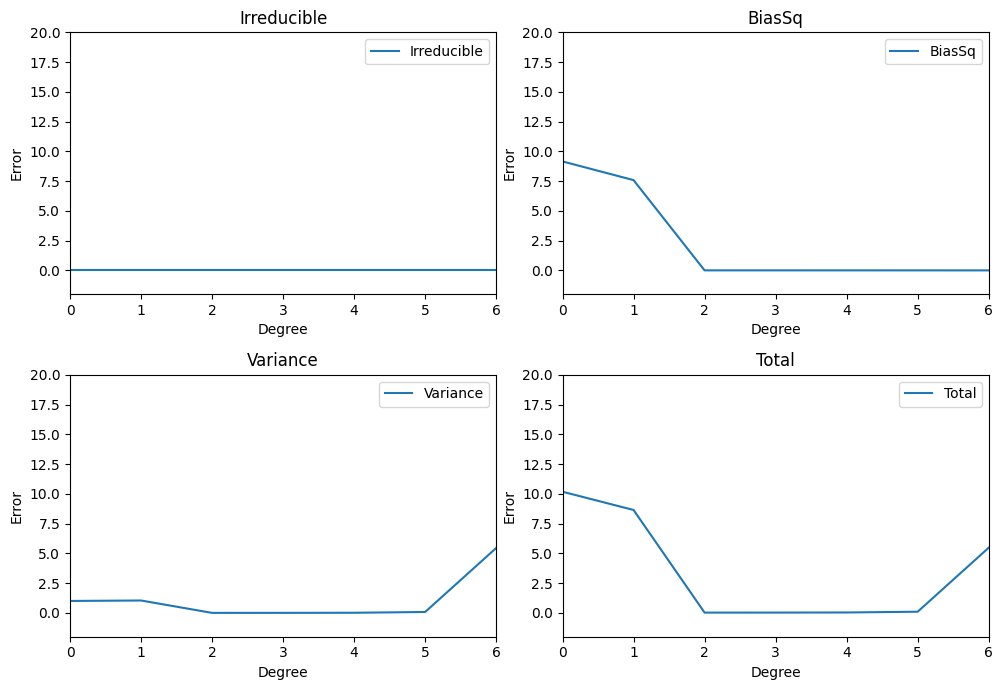

In [199]:
### Task 3b ii.

plt.figure(figsize=(10,7))
for col in range(0, 4):
    plt.subplot(2,2,col+1)
    plt.plot(out_table.index, out_table.iloc[:,col],
             label=out_table.columns[col])
    plt.legend()
    plt.title(out_table.columns[col])
    plt.ylim(-2, 20)
    plt.xlim(0, 6)
    plt.xlabel('Degree')
    plt.ylabel('Error')
plt.tight_layout()
plt.show()

### Task 3b iii.
this is basically what I would expect from the discussion in task a

## Problem 4:

### Task 4.a
![task 4a](task-4-i.jpg)

### Task 4.b: 
![task 4 b](task-4-ii.jpg)

### Task 4.c: 
![task 4 c](task-4-iii.jpg)

### Task 4.d
One of the primary objectives in machine learning is to minimize the generalization error. However, in model development, the focus is often on reducing the training error. Task c demonstrates that the generalization error is always greater than or equal to the training error. This implies that when aiming to reduce generalization error, relying solely on training error is insufficient. Instead, we need to evaluate machine learning models based on their ability to generalize to new, unseen data.

## Problem 5:

In [236]:
### Task 5.a (code):

# Load datasets
d1 = pd.read_csv('data/d1.csv')
d2 = pd.read_csv('data/d2.csv')
d3 = pd.read_csv('data/d3.csv')
d4 = pd.read_csv('data/d4.csv')

# List of datasets
data_list = [d1, d2, d3, d4]

# Fit OLS model for each dataset
model_list = [sm.OLS(model['y'],
              sm.add_constant(model['x'])).fit() 
              for model in data_list]

# Display model statistics for each dataset
for i, model in enumerate(model_list):
    intercept, slope = model.params
    intercept_se, slope_se = model.bse
    intercept_pvalue, slope_pvalue = model.pvalues
    r_squared = model.rsquared
    print("Model for Dataset: " + str(i+1))
    print(f"Intercept: Estimate = {intercept:.4f}, SE = {intercept_se:.4f}, p-value = {intercept_pvalue:.4f}")
    print(f"Slope:     Estimate = {slope:.4f}, SE = {slope_se:.4f}, p-value = {slope_pvalue:.4f}")
    print(f"R-squared: {r_squared:.4f}")
    print("")


Model for Dataset: 1
Intercept: Estimate = 3.0001, SE = 1.1247, p-value = 0.0257
Slope:     Estimate = 0.5001, SE = 0.1179, p-value = 0.0022
R-squared: 0.6665

Model for Dataset: 2
Intercept: Estimate = 3.0009, SE = 1.1253, p-value = 0.0258
Slope:     Estimate = 0.5000, SE = 0.1180, p-value = 0.0022
R-squared: 0.6662

Model for Dataset: 3
Intercept: Estimate = 3.0025, SE = 1.1245, p-value = 0.0256
Slope:     Estimate = 0.4997, SE = 0.1179, p-value = 0.0022
R-squared: 0.6663

Model for Dataset: 4
Intercept: Estimate = 3.0017, SE = 1.1239, p-value = 0.0256
Slope:     Estimate = 0.4999, SE = 0.1178, p-value = 0.0022
R-squared: 0.6667



### Task 5.a (written portion)
From the models, we observe that as x increases, y tends to increase as well. This trend is statistically significant, as indicated by the p-values being smaller than 0.05. This suggests a high correlation between x and y.

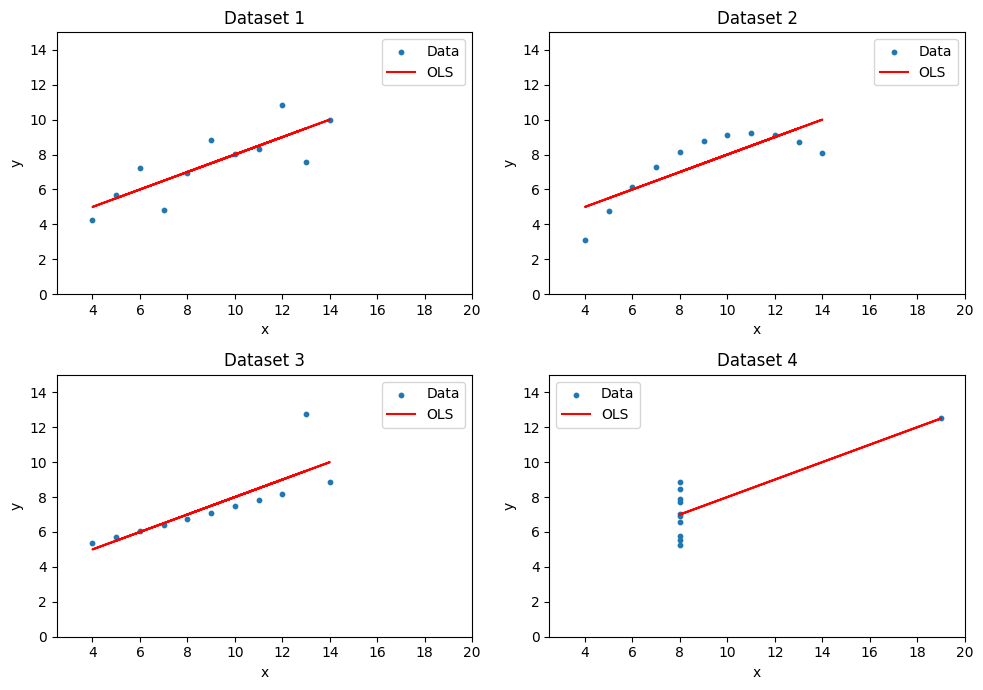

In [219]:
### Task 5b (code):

plt.figure(figsize=(10,7))
for i, model in enumerate(model_list):
    plt.subplot(2,2,i+1)
    plt.scatter(data_list[i]['x'], data_list[i]['y'],
                s=10, label='Data')
    plt.plot(data_list[i]['x'],
             model.predict(sm.add_constant(data_list[i]['x'])),
             color='red', label='OLS')
    plt.legend()
    plt.title('Dataset ' + str(i+1))
    plt.xlim(2.5,20)
    plt.ylim(0,15)
    plt.xlabel('x')
    plt.ylabel('y')
plt.tight_layout()
plt.show()

### Task 5b (written part):
- all OLS regression lines have almost the same slope and y intercept even though the data sets look very different 

### Task 5c: 
- data set 1:
    - nothing looks wrong 
- data set 2:
    - we can see the data is non-linearar, suggesting the error is non-lineararity of the data.
- data set 3:
    - point 9 is far off the OLS regression line suggesting that is is and outlier. this suggest and outlier problem
- data set 4:
    - point 8 is far away from the rest of the data which is squeing the OLS regression line, this suggests a High leverage points problem


## Problem 6:

In [227]:
### Task 6.a:

og_model = model_list[1]
coefficients = np.zeros((1000, 2)) 

for i in range(1000):
    sample = resample(d2, n_samples=len(d2)) 
    X_sample = sample['x'].values.reshape(-1, 1)
    y_sample = sample['y'].values

    model = LinearRegression()
    model.fit(X_sample, y_sample)
    coefficients[i, :] = [model.intercept_, model.coef_[0]]

bootstrap_se = coefficients.std(axis=0)
print(f"original model Intercept SE = {og_model.bse[0]:.4f}")
print(f"original model Slope SE = {og_model.bse[1]:.4f}")
print(f"bootstrap model Intercept SE = {bootstrap_se[0]:.4f}")
print(f"bootstrap model Slope SE = {bootstrap_se[1]:.4f}")
print(bootstrap_se)

original model Intercept SE = 1.1253
original model Slope SE = 0.1180
bootstrap model Intercept SE = 1.6245
bootstrap model Slope SE = 0.1711


### task a (written portion):
The bootstrap Standard errors are more trustworthy as it does not rely on any assuptions of poputaion varience, noise varience and correctness of the linear model (the original one does). 

### Task b: 
The bootstrap method draws samples from the original data set to crete new samples, it then fits a liner regression model to each bootstrap sample and records the intersept and slope values. Finally it gets the intercept and slope standard error by taking the standard deviation of the intersept and slope values of all of the samples.

### Task c:
for bootstrap sampling, the probability that a sample is not chosen is: 

$$ P(\text{not chosen}) = 1 - \frac{1}{n} $$

When sampling with replacement n times (for a sample size of n) we have:

$$ P(\text{not in sample}) = \left(1 - \frac{1}{n}\right)^n $$

As n gets very large and aproaches infinity, using the limit of the equation we find the probability approaches:

$$ \lim_{{n \to \infty}} \left(1 - \frac{1}{n}\right)^n = \frac{1}{e} \approx 0.368 $$

thus the probability y that the 𝑗th observation is not in the bootstrap sample is about $ \frac{1}{e} \approx 0.368 $  when 𝑛 is very large.

## Problem 7:

### Task a:
This week I learned a lot about how Linear regression and classification is done. I had already learned from previous courses about the basics of statiscial learning and basic sourses of gerneral error however reading the material this week gave me a much more indepth understanding. I also learned or relearned alot about coding statistical learning models. The last time I had done a data science course was over a year ago, so it took some time to get back into the flow of training and testing models.  

I still have some confusion with L4: estimating model parameters and controlling flexibility. I feel like I have not yet had enough time to full understand all of the math from that lecture. Otherwise I feel confident in my understanding. 

Due to personal reasons, I have been very busy for the first weeks and wish I could have spent more time for the next homework I will try to balance out the learning over a longer period of time so taht I am able to more comfterbly complete the tasks. 


### Task b: 
probably about 10 hours 